In [4]:
# read the data
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'gp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

In [5]:
pima.head()

,pregnant,glucose,gp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima.tail()

,pregnant,glucose,gp,skin,insulin,bmi,pedigree,age,label
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
#define X and y
features_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[features_cols]
y = pima.label

In [8]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
#train logistic refression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
y_pred_class = logreg.predict(X_test)

In [11]:
#calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [12]:
# examine the class distribution of the testing set
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [13]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [14]:
#calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [15]:
# calculates null accuracy (for binary classification problems codes as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [16]:
# calculates null accuracy (for multi-class classification problems)
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: label, dtype: float64

# Confusion matrix

In [17]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


(Sensitivity)True positive rate

In [43]:
# True positive
metrics.recall_score(y_test, y_pred_class)

0.74193548387096775

Specivity(True negative rate)

In [19]:
#############

Precision score (when a 1 value is predicted, how often is the prediction correct?)

In [36]:
metrics.precision_score(y_test, y_pred_class)

0.47916666666666669

In [21]:
 # allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [25]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

Text(0,0.5,'Frequency')

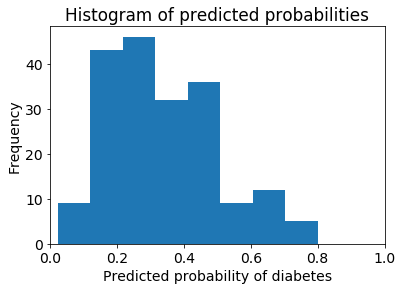

In [26]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [30]:
#predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [31]:
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [33]:
#confusiion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


Sensitivity

In [34]:
metrics.recall_score(y_test, y_pred_class)

0.74193548387096775

# ROC curve for diabetes classifier

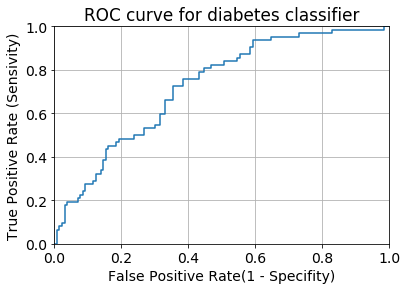

In [39]:
#IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate(1 - Specifity)')
plt.ylabel('True Positive Rate (Sensivity)')
plt.grid(True)

In [40]:
#define a function that accepts a threshold and prints sensivity and specifity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [41]:
evaluate_threshold(0.5)

Sensitivity: 0.241935483871
Specificity: 0.907692307692


In [42]:
evaluate_threshold(0.3)

Sensitivity: 0.725806451613
Specificity: 0.615384615385
